In [1]:
#TEXT EMOTION DETECTION

In [2]:
#create dataframe
import pandas as pd
df=pd.read_csv("/content/Text Emotions Detection.csv")
df

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
...,...,...,...
10984,1963081293,worry,@DavidGibbons Thanks for the link. I've been o...
10985,1963081315,sadness,@XJakeXChaosX no their playing in st.pete but...
10986,1963081425,fun,"@riannesketch well, someone told me it's only ..."
10987,1963081546,sadness,@musecrossing it's not the 10.5% so much as th...


<Axes: xlabel='sentiment', ylabel='count'>

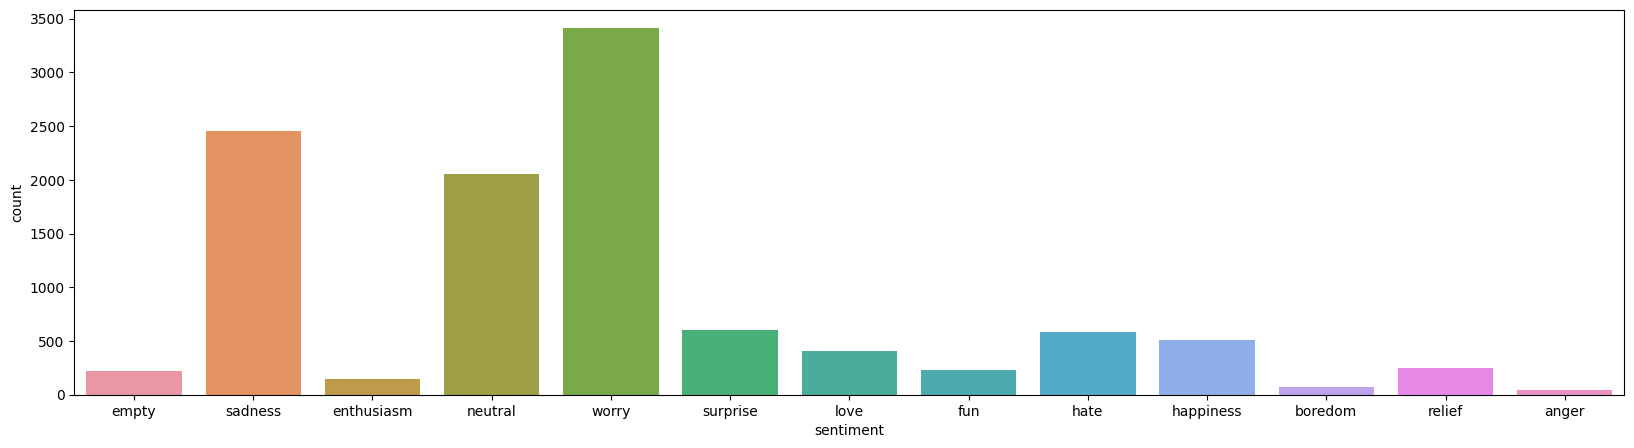

In [16]:
#visualisation
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
sns.countplot(x='sentiment',data=df)

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [4]:
#divide data into ip op

In [5]:
x = vectorizer.fit_transform(df['content'])
x

<10989x18476 sparse matrix of type '<class 'numpy.float64'>'
	with 134917 stored elements in Compressed Sparse Row format>

In [6]:
y = df['sentiment']
y

0             empty
1           sadness
2           sadness
3        enthusiasm
4           neutral
            ...    
10984         worry
10985       sadness
10986           fun
10987       sadness
10988     happiness
Name: sentiment, Length: 10989, dtype: object

In [11]:
#training and testing variables
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [13]:
#apply classifiers
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Support Vector Machines', SVC()),
    ('Naive Bayes', MultinomialNB()),
    ('Random Forest', RandomForestClassifier()),
]

In [14]:
#predict the op and accuracy
from sklearn.metrics import accuracy_score
for clf_name, clf in classifiers:
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)*100
    print(f"{clf_name} Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 32.3021
Support Vector Machines Accuracy: 32.1656
Naive Bayes Accuracy: 30.5732
Random Forest Accuracy: 31.5742
